# Aircraft Crashes Data Analysis and Visualization

## Overview

This notebook analyses the data and provides insights about the aircraft crashes since 1918.


### About Dataset

`date` date of the accident          
`aircraft_type` aircraft make and model      
`operator` operator of the aircraft    
`flight_phase` phase of the flight when the accident occured
`flight_type` type of flight (ex: military)   
`survivors` indicates if there was survivors or not     
`site` type of location where the accident happened (ex: mountains)  
`location` location of the accident       
`country` country where the crash happened      
`region` region of the world where the crash happened   
`crew_on_board` number of crew members on board at the time of the accident      
`crew_fatalities` number of crew members who died in the crash        
`pax_on_board` number of passengers on board at the time of the accident         
`pax_fatalities` number of passengers who died in the crash         
`other_fatalities` other victims of the accident outside of the aircraft       
`total_fatalities` total number of deaths

---

## Exploratory Data Analysis

1. Number of accidents over the years
2. Average number of accidents and fatalities per year 
3. Number of accidents by site
4. Top 3 aircrafts with the most accidents
5. Top 5 commercial airline companies with the most accidents
6. Number of fatalities over the years
7. Top 5 deadliest accidents involving a single aircraft
8. Top 5 deadliest accidents involving more than one aircraft
9. Proportion of accidents with survivors
10. Correlation between numeric variables

In [1]:
from datetime import datetime
from IPython.core.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

In [2]:
# Load data
with open('data/crashes_cleaned_data.pkl', 'rb') as handle:
	df = pickle.load(handle)

In [3]:
df.sample(5)

,date,aircraft_type,operator,flight_phase,flight_type,survivors,site,location,country,region,crew_on_board,crew_fatalities,pax_on_board,pax_fatalities,other_fatalities,total_fatalities
27276,1987-10-19 00:00:00,Antonov AN-12,MAP - Ministerstvo Aviatsionnoi Promyshlennost...,Takeoff (climb),Cargo,False,Airport (less than 10 km from airport),Komsomolsk-on-Amur,Russia,Asia,5,5,4,4,0,9
8222,1941-09-20 00:00:00,Bristol 142 Blenheim,Royal Air Force - RAF,Flight,Training,False,"Lake, Sea, Ocean, River",Lough Neagh,United Kingdom,Europe,3,3,0,0,0,3
30295,1998-07-24 22:08:00,Cessna 500 Citation,Skyward Aviation - Canada,Takeoff (climb),Cargo,True,Airport (less than 10 km from airport),Rawlins,United States of America,North America,2,0,0,0,0,0
33885,2016-06-03 10:00:00,Cessna 208B Grand Caravan,Lady Lori (Kenya) Ltd,Takeoff (climb),Charter/Taxi (Non Scheduled Revenue Flight),True,Airport (less than 10 km from airport),Akobo,South Sudan,Africa,1,0,4,0,0,0
1487,1930-07-09 16:32:00,Farman F.63bis Goliath,Société Générale des Transports Aériens - SGTA,Takeoff (climb),Cargo,True,Airport (less than 10 km from airport),Amsterdam-Schiphol,Netherlands,Europe,3,1,0,0,0,1


### Number of accidents over the years

In [6]:
# Get the years with the most accidents
crashes_per_year = df.groupby(df['date'].dt.year).size()
crashes_per_year.nlargest(n=5)

date
1941    2850
1942    2733
1940    2088
1944     914
1943     814
dtype: int64

In [ ]:
# Get flight types with the most accidents in 1941
most_accidents = df[df['date'].dt.year == crashes_per_year.idxmax()]
most_accidents['flight_type'].value_counts().head()

flight_type
Bombing                             31
Military                            18
Survey / Patrol / Reconnaissance     8
Training                             2
Skydiving / Paratroopers             1
Name: count, dtype: int64

In [11]:
# Get operators with the most accidents in May 10th 1940
most_accidents['operator'].value_counts()

operator
German Air Force - Deutsche Luftwaffe                          39
Royal Air Force - RAF                                          14
Royal Netherlands Air Force - Luchtvaartbrigade (1913-1953)     5
French Air Force - Armée de l'Air                               2
Name: count, dtype: int64

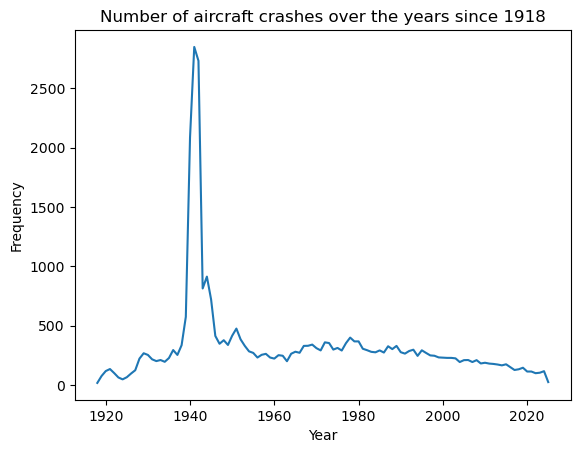

In [12]:
# Visualization of crashes over the years
ax = sns.lineplot(crashes_per_year)
ax.set_title('Number of aircraft crashes over the years since 1918')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency');

The number of crashes remained relatively constant, except in the early 1940s. The majority of the flight types were Bombing and Military. Also, the operators with the most accidents were air forces, which makes sense because it was during the World War II (1939-1945). In order to not skew the results, the rest of the analysis will be made for the accidents after that period.

In [ ]:
# Filter and export data
df = df[df['date'].dt.year > 1945]

with open('data/crashes_cleaned_data2.pkl', 'wb') as handle:
  pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

df.to_csv('data/crashes_cleaned_data2.csv')

In [ ]:
# Plot accidents over time after World War II
crashes_per_year = df.groupby(df['date'].dt.year).size()
ax = sns.lineplot(crashes_per_year)
ax.set_title('Number of aircraft crashes over the years after World War II')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency');

### Average number of accidents and fatalities per year 

In [ ]:
this_year = datetime.today().year
earliest_year = df['date'].dt.year.min()
total_years = this_year - earliest_year

In [ ]:
print(f'Average number of crashes per year: {len(df) / total_years:.2f}')
print(f'Average number of fatalities per year: {df['total_fatalities'].sum() / total_years:.2f}')

### Number of accidents by site

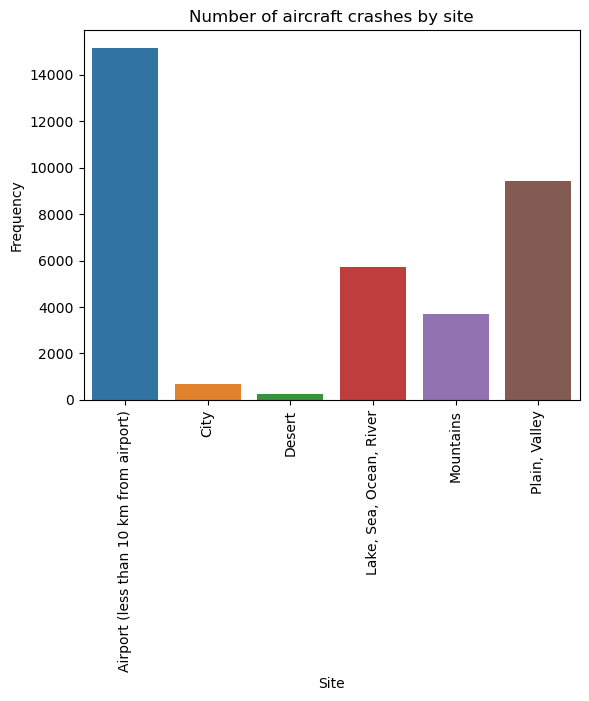

In [16]:
# Visualization
ax = sns.countplot(data=df, x='site', hue='site')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of aircraft crashes by site')
ax.set_xlabel('Site')
ax.set_ylabel('Frequency');

In [ ]:
# Get flight phases of the accidents happening close to an airport
airport = df[df['site'].str.contains('Airport')]
airport['flight_phase'].value_counts()

In [ ]:
# Visualization
ax = sns.countplot(data=airport, x='flight_phase', hue='flight_phase')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of aircraft crashes by flight phase')
ax.set_xlabel('Flight Phase')
ax.set_ylabel('Frequency');

It shows that most accidents happen during the takeoff and landing.

### Top 3 aircrafts with the most accidents

To avoid the results being skewed by the crashes of military airplanes that happened in World War II, the accidents since 1946 will be analyzed.

In [ ]:
df[df['date'].dt.year > 1945]['aircraft_type'].value_counts().head(3)

aircraft_type
Douglas C-47 Skytrain (DC-3)    2066
Bristol 142 Blenheim            1369
PZL-Mielec AN-2                  770
Name: count, dtype: int64

In [ ]:
# Display planes
display(Image(url='https://lyonairmuseum.org/wp-content/uploads/2020/08/IMG2_2146.jpg', width=400, unconfined=True, alt='Douglas C-47 Skytrain'))
display(Image(url='https://www.baaa-acro.com/sites/default/files/crash/images/R3600.jpg', width=400, unconfined=True, alt='Bristol 142 Blenheim'))
display(Image(url='https://skybrary.aero/sites/default/files/AN2.jpg', width=400, unconfined=True, alt='PZL-Mielec AN-2'))

The top 2 are military aircrafts and the third one is an utilitary aircraft.

### Top 5 commercial airline companies with the most accidents

In [ ]:
df[df['flight_type'].str.contains('Revenue Flight')]['operator'].value_counts().head()

operator
Aeroflot - Russian International Airlines      795
Air France                                      81
Deutsche Lufthansa                              71
British Overseas Airways Corporation - BOAC     53
American Airlines                               50
Name: count, dtype: int64

There's a big diffrence with the number of accidents from Aeroflot compared to the others, which gives the perception of the airline company not being safe or reliable.

###  Number of fatalities over the years

In [ ]:
# Get years with the most fatalities since 1918
deaths_per_year = df.groupby(df['date'].dt.year)['total_fatalities'].sum()
deaths_per_year.nlargest(n=5)

In [ ]:
# Get years with the most fatalities after World War II
deaths_per_year2 = after_wwii.groupby(after_wwii['date'].dt.year)['total_fatalities'].sum()
deaths_per_year2.nlargest(n=5)

date
1942    8969
1941    7700
1940    4807
1945    4687
1944    4604
Name: total_fatalities, dtype: int64

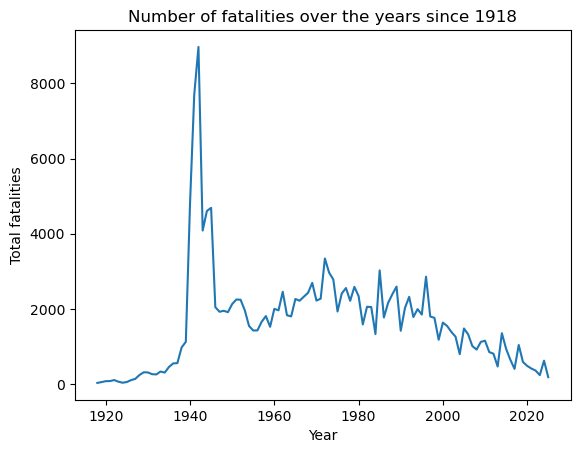

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1 = sns.lineplot(deaths_per_year)
ax1.set_title('Number of fatalities over the years since 1918')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total fatalities');

ax2 = sns.lineplot(deaths_per_year2)
ax2.set_title('Number of fatalities over the after World War II')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total fatalities');

Again, the years with the most fatalities were during the World War II. The number of deaths increased from the 1950s to the 1970s and there is an downward trend since the 1970s.

### Top 5 deadliest accidents involving a single aircraft

In [23]:
df.nlargest(n=5, columns='total_fatalities') \
	[['date', 'aircraft_type', 'operator', 'location', 'country', 'site', 'total_fatalities']]

,date,aircraft_type,operator,location,country,site,total_fatalities
26629,1985-08-12 18:56:00,Boeing 747-200,Japan Airlines,Mt Osutaka,Japan,Mountains,520
22964,1974-03-03 11:41:00,Douglas DC-10,Turkish Airlines - THY Türk Hava Yollari,Ermenonville,France,"Plain, Valley",346
23890,1977-03-27 17:06:00,Boeing 747-100,Pan American World Airways - PAA,Tenerife-Norte-Los Rodeos,Spain,Airport (less than 10 km from airport),335
26586,1985-06-23 07:15:00,Boeing 747-200,Air India,Atlantic Ocean,World,"Lake, Sea, Ocean, River",329
29877,1996-11-12 18:40:00,Boeing 747-100,Saudi Arabian Airlines - SAUDIA,Charkhi Dadri,India,"Plain, Valley",312


The deadliest aviation accident involving a single plane happened in August 12th 1985 in Japan, with 520 fatalities.

In [ ]:
# Display accident
display(Image(url='https://www.baaa-acro.com/sites/default/files/crash/images/JA8119-2.jpg', width=500, unconfined=True, alt='JL123 Crash'))

### Top 5 deadliest accidents involving more than one aircraft

In [ ]:
# Get accidents involving multiple aircrafts
nb_accidents = df.groupby(['date', 'location', 'country', 'site']) \
	.agg(nb_aircrafts=('total_fatalities', 'size'), total_fatalities=('total_fatalities', 'sum'))
nb_accidents

In [25]:
# Get two planes involved in March 27th 1977 collision
tenerife = (df['date'].dt.year == 1977) & (df['date'].dt.month == 3) & (df['location'].str.contains('Tenerife'))
df[tenerife][['date', 'aircraft_type', 'operator', 'location', 'country', 'site' ,'total_fatalities']]

,date,aircraft_type,operator,location,country,site,total_fatalities
23890,1977-03-27 17:06:00,Boeing 747-100,Pan American World Airways - PAA,Tenerife-Norte-Los Rodeos,Spain,Airport (less than 10 km from airport),335
23891,1977-03-27 17:06:00,Boeing 747-200,KLM Royal Dutch Airlines - Koninklijke Luchtva...,Tenerife-Norte-Los Rodeos,Spain,Airport (less than 10 km from airport),248


In [ ]:
# Get total deaths
df[tenerife]['total_fatalities'].sum()

583

The deadliest aircraft accident involving more than one plane is the collision between two Boeing-747 planes in March 27th 1977 in the Canary Islands, where 583 people were killed. Because of the number of fatalities, this makes it the worst accident ever of the aviation history

In [ ]:
# Display two planes involved in accident
display(Image(url='https://www.baaa-acro.com/sites/default/files/crash/images/PH-BUF-9.jpg', width=500, unconfined=True, alt='KLM plane crash March 27th 1977'))
display(Image(url='https://www.baaa-acro.com/sites/default/files/crash/images/N736PA-8.jpg', width=500, unconfined=True, alt='Pan Am plane crash in March 27th 1977'))

### Proportion of accidents with survivors

In [29]:
# Get ratio of accidents with survivors
ratio_survivors = df['survivors'].value_counts(normalize=True)
ratio_survivors

survivors
False    0.520397
True     0.479603
Name: proportion, dtype: float64

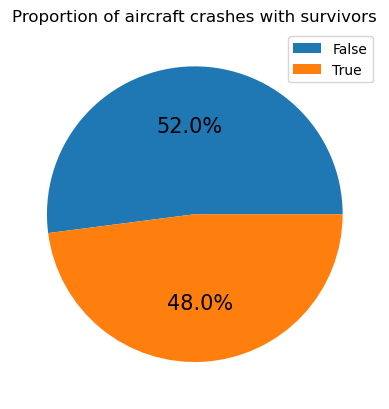

In [30]:
# Visualization
plt.pie(ratio_survivors, autopct='%.1f%%', textprops={'fontsize': 15})
plt.legend(labels=ratio_survivors.index)
plt.title('Proportion of aircraft crashes with survivors')
plt.show()

In [31]:
# Get ratio of accidents where all people survived
all_survived_mask = df['total_fatalities'] == 0

ratio_no_deaths = pd.Series({
  True: len(df[all_survived_mask]) / len(df),
  False: len(df[~all_survived_mask]) / len(df)
})
ratio_no_deaths

True     0.378762
False    0.621238
dtype: float64

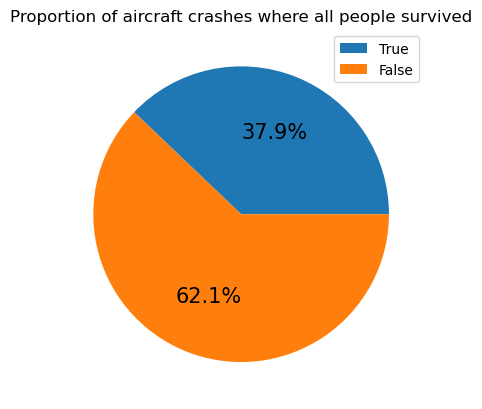

In [32]:
# Visualization
plt.pie(ratio_no_deaths, autopct='%.1f%%', textprops={'fontsize': 15})
plt.legend(labels=ratio_no_deaths.index)
plt.title('Proportion of aircraft crashes where all people survived')
plt.show()

### Correlation between numeric variables

In [ ]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True);

In [ ]:
sns.clustermap(corr_matrix, annot=True);

## End